# LOADING DATASET

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("chennai_house_price_prediction.csv")
df.shape

(7109, 19)

In [4]:
df.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250


# DATA EXPLORATION

In [5]:
df.describe(include='all')

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109,7109,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109,7109,7109,7109,7109,7109,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7.109000e+03
unique,7109,17,NaN,NaN,NaN,NaN,NaN,9,3,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN
top,P00706,Chrompet,NaN,NaN,NaN,NaN,NaN,AdjLand,Yes,House,AllPub,Paved,RL,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1681,NaN,NaN,NaN,NaN,NaN,1433,3587,2444,1886,2560,1858,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1382.073006,99.603179,1.637029,1.213260,3.688704,NaN,NaN,NaN,NaN,NaN,NaN,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,NaN,NaN,457.410902,57.403110,0.802902,0.409639,1.019099,NaN,NaN,NaN,NaN,NaN,NaN,0.891972,0.897834,0.887266,0.527223,78768.093718,3.768603e+06
min,NaN,NaN,500.000000,0.000000,1.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,NaN,NaN,993.000000,50.000000,1.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,NaN,NaN,1373.000000,99.000000,1.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.500000,3.500000,3.500000,3.500000,127628.000000,1.033505e+07
75%,NaN,NaN,1744.000000,148.000000,2.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.300000,4.300000,4.300000,3.890000,184506.000000,1.299390e+07


In [6]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

In [7]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [8]:
temp=pd.DataFrame(index=df.columns)
temp['DATA TYPE']=df.dtypes
temp['NULL COUNT']=df.isna().sum()
temp['UNIQUE']=df.nunique()

In [9]:
temp

,DATA TYPE,NULL COUNT,UNIQUE
PRT_ID,object,0,7109
AREA,object,0,17
INT_SQFT,int64,0,1699
DIST_MAINROAD,int64,0,201
N_BEDROOM,float64,1,4
N_BATHROOM,float64,5,2
N_ROOM,int64,0,5
SALE_COND,object,0,9
PARK_FACIL,object,0,3
BUILDTYPE,object,0,5


#  UNIVARIATE ANALYSIS

Text(0.5, 0, 'INT_SQFT')

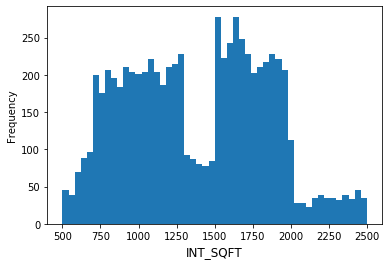

In [10]:
df['INT_SQFT'].plot.hist(bins=50)
plt.xlabel('INT_SQFT',fontsize=12)

Text(0.5, 0, 'DISTANCE')

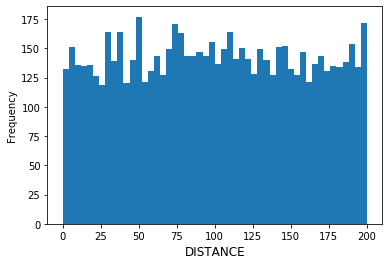

In [11]:
df['DIST_MAINROAD'].plot.hist(bins=50)
plt.xlabel('DISTANCE',fontsize=12)

Text(0.5, 0, 'SALES')

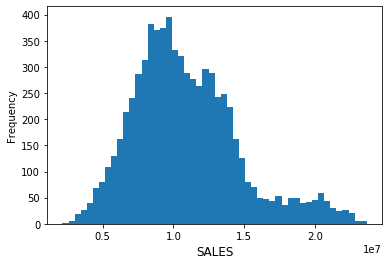

In [12]:
df['SALES_PRICE'].plot.hist(bins=50)
plt.xlabel('SALES',fontsize=12)

Text(0.5, 0, 'COMMISION')

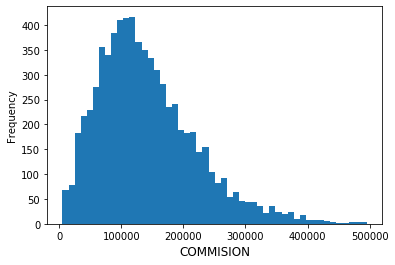

In [13]:
df['COMMIS'].plot.hist(bins=50)
plt.xlabel('COMMISION',fontsize=12)

# VALUE COUNTS

In [14]:
df['N_BEDROOM'].value_counts()/len(df)*100

1.0    53.383036
2.0    33.084822
3.0     9.945140
4.0     3.572936
Name: N_BEDROOM, dtype: float64

In [15]:
df['N_BATHROOM'].value_counts()/len(df)*100

1.0    78.618652
2.0    21.311014
Name: N_BATHROOM, dtype: float64

In [16]:
df['N_ROOM'].value_counts()/len(df)*100

4    36.052891
3    29.891687
5    17.527078
2    12.955409
6     3.572936
Name: N_ROOM, dtype: float64

In [17]:
df['QS_BATHROOM'].value_counts()/len(df)*100

2.7    3.601069
4.8    3.587002
3.7    3.530736
4.7    3.474469
4.9    3.446336
3.0    3.390069
4.2    3.333802
4.6    3.291602
2.2    3.291602
3.4    3.291602
2.5    3.277536
4.0    3.263469
3.1    3.263469
4.5    3.249402
2.4    3.235335
2.9    3.207202
3.3    3.193135
2.6    3.179069
3.2    3.179069
3.5    3.165002
2.1    3.150935
4.3    3.150935
2.0    3.122802
3.6    3.108735
2.3    3.094669
4.4    3.080602
5.0    3.080602
3.9    2.968069
4.1    2.954002
3.8    2.939935
2.8    2.897735
Name: QS_BATHROOM, dtype: float64

In [18]:
df['QS_BEDROOM'].value_counts()/len(df)*100

2.6    3.840203
3.2    3.558869
4.0    3.488536
3.8    3.432269
2.4    3.432269
3.1    3.418202
2.1    3.404136
3.0    3.390069
3.4    3.361936
2.2    3.333802
4.4    3.333802
3.5    3.333802
4.3    3.333802
3.3    3.291602
4.6    3.277536
4.7    3.207202
4.5    3.193135
2.5    3.179069
3.6    3.165002
4.1    3.136869
2.7    3.122802
2.0    3.108735
3.9    3.094669
2.9    3.080602
5.0    3.052469
4.2    2.982135
4.8    2.968069
2.8    2.954002
3.7    2.855535
4.9    2.855535
2.3    2.813335
Name: QS_BEDROOM, dtype: float64

In [19]:
df['QS_OVERALL'].value_counts()/len(df)*100

3.540    0.829934
3.260    0.801801
3.320    0.787734
3.560    0.773667
3.360    0.759601
           ...   
4.075    0.014067
4.930    0.014067
2.585    0.014067
2.445    0.014067
2.545    0.014067
Name: QS_OVERALL, Length: 479, dtype: float64

In [20]:
df['QS_ROOMS'].value_counts()/len(df)*100

2.5    3.727669
3.8    3.643269
3.6    3.587002
4.6    3.544802
3.9    3.446336
4.9    3.404136
3.4    3.376002
4.7    3.361936
4.8    3.361936
4.2    3.361936
3.3    3.361936
2.6    3.333802
2.1    3.319736
3.1    3.235335
3.0    3.207202
5.0    3.207202
3.5    3.193135
2.8    3.179069
4.3    3.165002
2.3    3.150935
4.1    3.122802
2.9    3.094669
4.4    3.080602
4.5    3.066535
4.0    3.066535
2.2    2.996202
3.2    2.925869
2.4    2.925869
3.7    2.883669
2.0    2.855535
2.7    2.813335
Name: QS_ROOMS, dtype: float64

# DATA MANUPLITION

In [21]:
df.drop_duplicates()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,51,1.0,1.0,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,107060,5353000
7105,P10000,Velachery,1897,52,3.0,2.0,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,205551,10818480
7106,P09594,Velachery,1614,152,2.0,1.0,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,167028,8351410
7107,P06508,Karapakkam,787,40,1.0,1.0,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,119098,8507000


# MISSING VALUES

In [37]:
df.isna().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [23]:
df['N_BEDROOM'].mode()

0    1.0
dtype: float64

In [24]:
df['N_BEDROOM'].fillna(1.0,inplace=True)

In [25]:
df['N_BATHROOM'].mode()

0    1.0
dtype: float64

In [27]:
for i in range(0,len(df)):
    if pd.isna(df['N_BATHROOM'][i])==True:
        if(df['N_BEDROOM'][i]==1.0):
            df['N_BATHROOM'][i]=1.0
        else:
            df['N_BATHROOM'][i]=2.0


In [28]:
df[['QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL']]

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL
0,4.0,3.9,4.9,4.330
1,4.9,4.2,2.5,3.765
2,4.1,3.8,2.2,3.090
3,4.7,3.9,3.6,4.010
4,3.0,2.5,4.1,3.290
...,...,...,...,...
7104,3.0,2.2,2.4,2.520
7105,3.6,4.5,3.3,3.920
7106,4.3,4.2,2.9,3.840
7107,4.6,3.8,4.1,4.160


In [33]:
def fill_na(x):
    return ((x['QS_ROOMS']+x['QS_BATHROOM']+x['QS_BEDROOM']/3))

In [36]:
df['QS_OVERALL']=df.apply(lambda x: fill_na(x) if pd.isna(x['QS_OVERALL']) else x['QS_OVERALL'],axis=1)

# DATA TYPES

In [43]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM         object
N_BATHROOM        object
N_ROOM            object
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [42]:
#converting datatypes
df=df.astype({'N_BEDROOM':'object','N_BATHROOM':'object','N_ROOM':'object'})

In [44]:
temp=['PRT_ID','AREA','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE']
for i in temp:
    print('***********value count in ',i,'***********')
    print(df[i].value_counts())
    print('')

***********value count in  PRT_ID ***********
P00706    1
P02355    1
P07716    1
P09316    1
P02605    1
         ..
P01028    1
P04769    1
P02703    1
P04981    1
P03089    1
Name: PRT_ID, Length: 7109, dtype: int64

***********value count in  AREA ***********
Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chormpet         6
Chrmpet          6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
KKNagar          1
Adyr             1
Name: AREA, dtype: int64

***********value count in  N_BEDROOM ***********
1.0    3796
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

***********value count in  N_BATHROOM ***********
1.0    5593
2.0    1516
Name: N_BATHROOM, dtype: int64

***********value count in  N_ROOM ***********
4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

***********value count in  SA

In [46]:
df['AREA'].replace({'KKNagar':'KK Nagar','TNagar':'T Nagar','Chrompt':'Chrompet','Chormpet':'Chrompet','Chrmpet':'Chormpet','Karapakam':'Karapakkam','Ana Nagar':'Anna Nagar','Velchery':'Velachery','Adyr':'Adyar'},inplace=True)
df['AREA'].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     786
Adyar          774
T Nagar        501
Ann Nagar        2
Name: AREA, dtype: int64

In [50]:
df['SALE_COND'].replace({'Adj Land':'AdjLand','Ab Normal':'AbNormal','Partiall':'Partial','PartiaLl':'Partial'},inplace=True)
df['SALE_COND'].value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [52]:
df['PARK_FACIL'].replace({'Noo':'No'},inplace=True)
df['PARK_FACIL'].value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

***********value count in  STREET ***********
Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64


In [54]:
df['BUILDTYPE'].replace({'Others':'Other','Comercial':'Commercial'},inplace=True)
df['BUILDTYPE'].value_counts()

House         2444
Other         2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [56]:
df['UTILITY_AVAIL'].replace({'AllPub':'All Pub'},inplace=True)
df['UTILITY_AVAIL'].value_counts()

All Pub    1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

In [58]:
df['STREET'].replace({'Pavd':'Paved','NoAccess':'No Access'},inplace=True)
df['STREET'].value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

# BIVARIATE ANALYSIS

# HYPOTHESIS
area should affect the price of house

int_sq should affect the price of house

more rooms and bathrooms

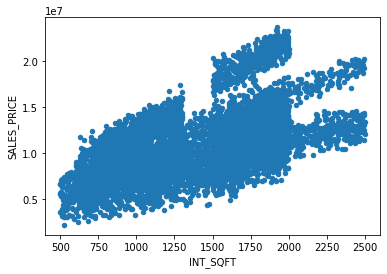

In [60]:
df.plot.scatter('INT_SQFT','SALES_PRICE')

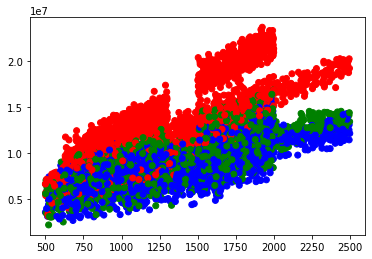

In [62]:
fig,ax=plt.subplots()
colors={'House':'blue','Commercial':'red','Other':'green'}
ax.scatter(df['INT_SQFT'],df['SALES_PRICE'],c=df['BUILDTYPE'].apply(lambda x:colors[x]))
plt.show()

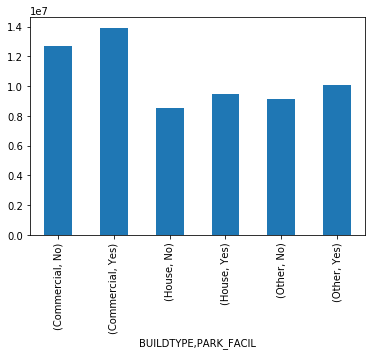

In [65]:
temp=df.groupby(['BUILDTYPE','PARK_FACIL']).SALES_PRICE.median()
temp.plot(kind='bar',stacked=True)